In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [207]:
d = pd.read_csv('loan.csv')

In [209]:
d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [211]:
d.shape

(614, 13)

In [213]:
d.duplicated().sum()

0

In [215]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [217]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [219]:
d.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

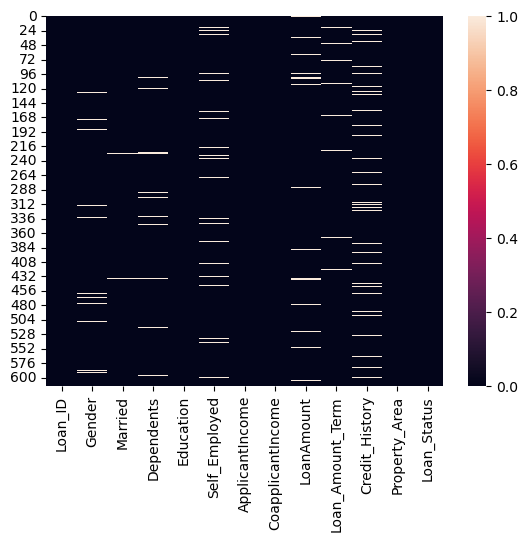

In [221]:
sns.heatmap(d.isnull())

In [222]:
d = d.dropna()

In [223]:
d.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

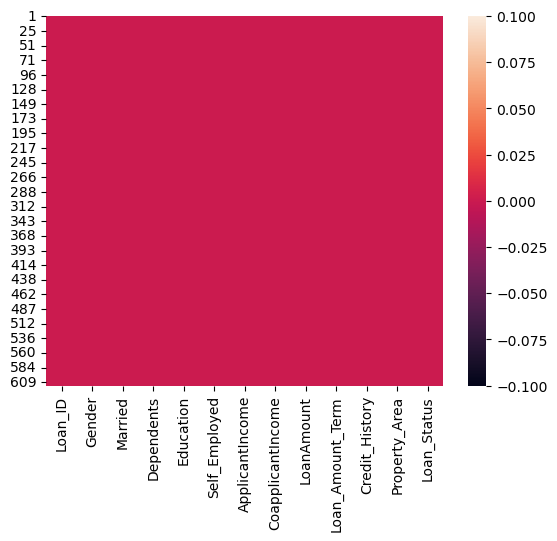

In [227]:
sns.heatmap(d.isnull())

In [228]:
d.Dependents.value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [229]:
d.replace(to_replace = '3+', value = 4, inplace = True)

# Data Analysis

In [234]:
d.Loan_Status.value_counts(normalize = True)

Loan_Status
Y    0.691667
N    0.308333
Name: proportion, dtype: float64

In [236]:
data ={'Loan_Status':['Y','N'], 'Count':[69,31]}
df = pd.DataFrame(data)
df['prop'] = (df['Count']/df['Count'].sum())*100



In [238]:
print(df.columns)


Index(['Loan_Status', 'Count', 'prop'], dtype='object')


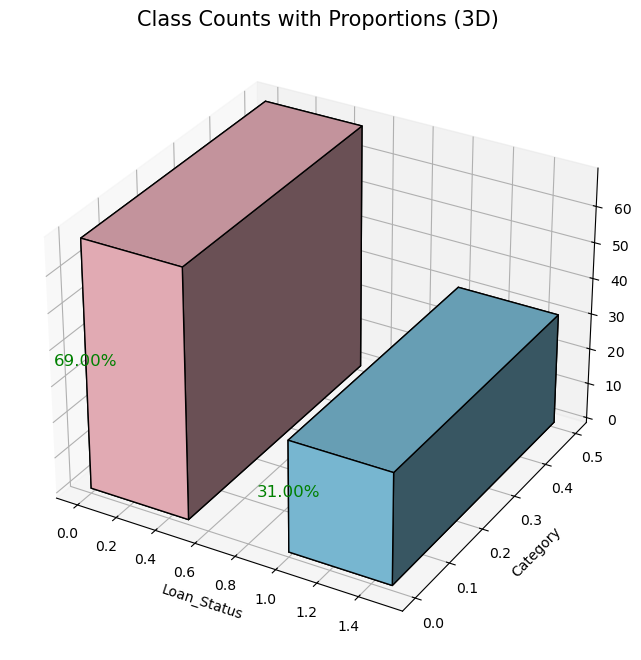

In [240]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111,projection = '3d')

df = pd.DataFrame(data)

x= np.arange(len(df['Loan_Status']))
y = np.zeros_like(x) 
z = np.zeros_like(x) 
dx =np.ones_like(x) * 0.5
dy = np.ones_like(x) * 0.5
dz = df['Count']

c = ['pink', 'skyblue'] 

ax.bar3d(x, y, z, dx, dy, dz, color=c, edgecolor='black')
if 'prop' not in df.columns:
    total_count = df['Count'].sum()
    df['prop'] = (df['Count'] / total_count) * 100


for i in range(len(df)):
    ax.text(
        x[i], y[i], dz[i] / 2,
        f'{df["prop"][i]:.2f}%',
        color='green', fontsize=12, ha='center'
    )

ax.set_xlabel('Loan_Status')
ax.set_ylabel('Category')
ax.set_zlabel('Count')
ax.set_title('Class Counts with Proportions (3D)', fontsize=15)

plt.show()


<Axes: xlabel='Gender', ylabel='count'>

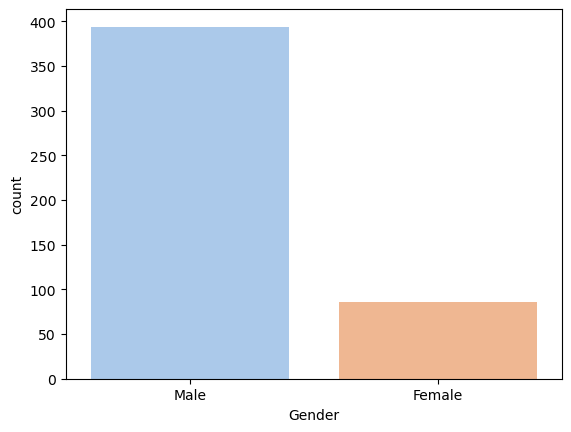

In [241]:
sns.countplot(x='Gender', data = d, palette = 'pastel')

<Axes: xlabel='Dependents', ylabel='count'>

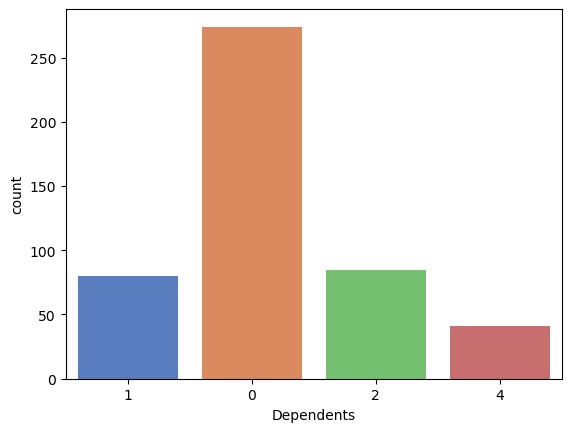

In [244]:
sns.countplot(x='Dependents', data = d, palette = 'muted')

Text(0.5, 1.0, 'Loan_Status & Education')

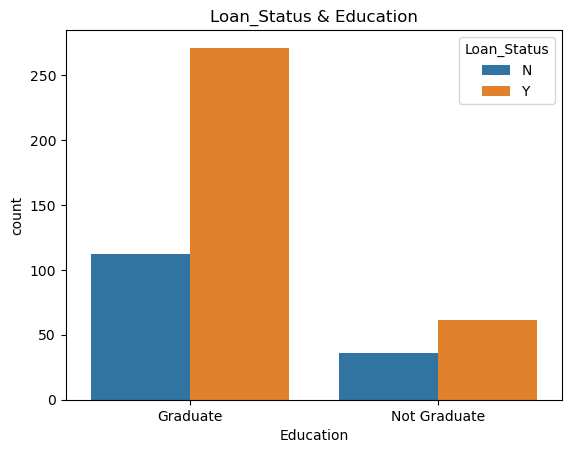

In [246]:
sns.countplot(data = d, x = 'Education', hue = 'Loan_Status')
plt.title('Loan_Status & Education')

<Axes: >

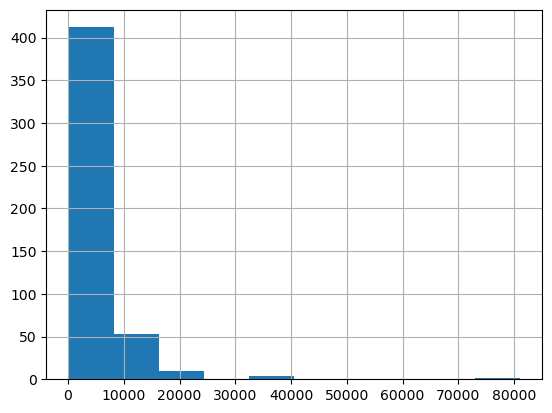

In [250]:
d.ApplicantIncome.hist()

In [254]:
le= LabelEncoder()
col = ['Loan_Status','Married','Gender','Self_Employed','Property_Area','Education']
for i in col:
    d[i] = le.fit_transform(d[i])


In [256]:
d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [261]:
d.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [263]:
numeric = d.select_dtypes(include=['number'])
d.groupby('Gender').mean().plot(kind = 'bar', subplots = True, sharex = False, sharey = False, gigsize = (15,15), layout = (3,4), alpha = 0.8, title = 'According to gender')
sns.set_style('Gender')
sns.set_context('paper')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

# Model Building

In [141]:
x = d.drop(['Loan_Status', 'Loan_ID'],axis = 1)
y = d['Loan_Status']

In [143]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [145]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int32

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,stratify = y, random_state = 31)

In [151]:
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.colors import ListedColormap
import re

# sklearn pipeline

In [156]:
log_pipeline = Pipeline([("scaler", StandardScaler()), ("logistic_regression", LogisticRegression(max_iter  = 1000))])
svm_pipeline = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])
knn_pipeline = Pipeline([("scaler", StandardScaler()), ("KNN", KNeighborsClassifier(n_neighbors = 7))])
NB_pipeline = Pipeline([("scaler", StandardScaler()), ("NB", GaussianNB())])
dt_pipeline = Pipeline([("scaler", StandardScaler()), ("DT", DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42))])


In [170]:
pipelines = [
    ("Logistic Regression", log_pipeline),
    ("SVM", svm_pipeline),
    ("KNN", knn_pipeline),
    ("Naive Bayes", NB_pipeline),
    ("Decision Tree", dt_pipeline)
]

results = {}

for name, pipe in pipelines:
    score = cross_val_score(pipe, x, y, cv=10)
    results[name] = score.mean()
for name, score in results.items():
    print(f"{name}: {score:.4f}")

Logistic Regression: 0.8042
SVM: 0.8063
KNN: 0.7979
Naive Bayes: 0.7917
Decision Tree: 0.7896


In [172]:
pipeline_fm = Pipeline([('scaler', StandardScaler()),('classifier', LogisticRegression())])

In [176]:
random_params = [
    {
        "classifier": [LogisticRegression()],
        "classifier__penalty": ["l2", "l1", "elasticnet", None],
        "classifier__C": np.logspace(-3, 3, 7), 
        "classifier__solver": ["liblinear", "newton-cg", "lbfgs", "saga"],
        "classifier__max_iter": [100, 200, 500],
        "classifier__multi_class": ["ovr", "multinomial"],
        "classifier__fit_intercept": [True, False],
        "classifier__tol": [0.0001, 0.001, 0.01],
        "classifier__class_weight": [None, "balanced"]
    },
    
    {
        "classifier": [SVC()],
        "classifier__C": np.logspace(-3, 3, 7), 
        "classifier__kernel": ["linear", "poly", "rbf", "sigmoid"],
        "classifier__degree": [2, 3, 4],  
        "classifier__gamma": ["scale", "auto"],
        "classifier__coef0": [0, 1, 10], 
        "classifier__shrinking": [True, False],
        "classifier__probability": [True, False],
        "classifier__tol": [0.0001, 0.001, 0.01],
        "classifier__max_iter": [100, 500, 1000, -1]  
    },
    
    {
        "classifier": [KNeighborsClassifier()],
        "classifier__n_neighbors": [3, 5, 7, 10, 15, 20],
        "classifier__weights": ["uniform", "distance"],
        "classifier__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
        "classifier__leaf_size": [10, 20, 30, 40],
        "classifier__p": [1, 2], 
        "classifier__metric": ["minkowski", "euclidean", "manhattan", "chebyshev"],
        "classifier__metric_params": [None],
        "classifier__n_jobs": [-1] 
    }
]


In [186]:
from sklearn.model_selection import RandomizedSearchCV


In [188]:
random_search = RandomizedSearchCV(estimator = pipeline_fm, param_distributions = random_params, scoring = 'neg_mean_absolute_error',n_jobs = -1, cv = 8, verbose = 10, random_state = 31)

In [190]:
best_model = random_search.fit(x_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


In [192]:
best_model.best_params_

{'classifier__tol': 0.0001,
 'classifier__solver': 'newton-cg',
 'classifier__penalty': None,
 'classifier__multi_class': 'multinomial',
 'classifier__max_iter': 500,
 'classifier__fit_intercept': True,
 'classifier__class_weight': None,
 'classifier__C': 1.0,
 'classifier': LogisticRegression()}

In [194]:
pipeline_fm = Pipeline([('scaler', StandardScaler()),('classifier', LogisticRegression())])

In [196]:
log = log_pipeline.fit(x_train,y_train)

In [198]:
y_pred = log.predict(x_test)

In [200]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.8125
